# Zhiguang Guan
# 301216265

In [1]:
import tensorflow as tf
from tensorflow import keras

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Import all the necessary libraries, read the dataset from Keras libraries using cifar10.load_data(). Normalize all the train and test images by dividing with 255.0. Employ one hot encoding for class labels in the train and test data.

In [2]:
import sys
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train_full.shape

(50000, 32, 32, 3)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_train_full = X_train_full.reshape(X_train_full.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train_full = X_train_full.astype('float32')/255
X_test = X_test.astype('float32')/255

In [7]:
(X_train, X_valid) = X_train_full[5000:], X_train_full[:5000] 
(y_train, y_valid) = y_train_full[5000:], y_train_full[:5000]

In [8]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


In [9]:
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(45000, 1)
(5000, 1)
(10000, 1)


In [10]:
y_tr_org = np.copy(y_train)
y_val_org = np.copy(y_valid)
y_tst_org = np.copy(y_test)

In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build a 2D CNN classifier model using Sequential API having the following parameters

In [12]:
model = keras.models.Sequential() #sequential API

model.add(keras.layers.Conv2D(filters=32, kernel_size= (3,3), padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

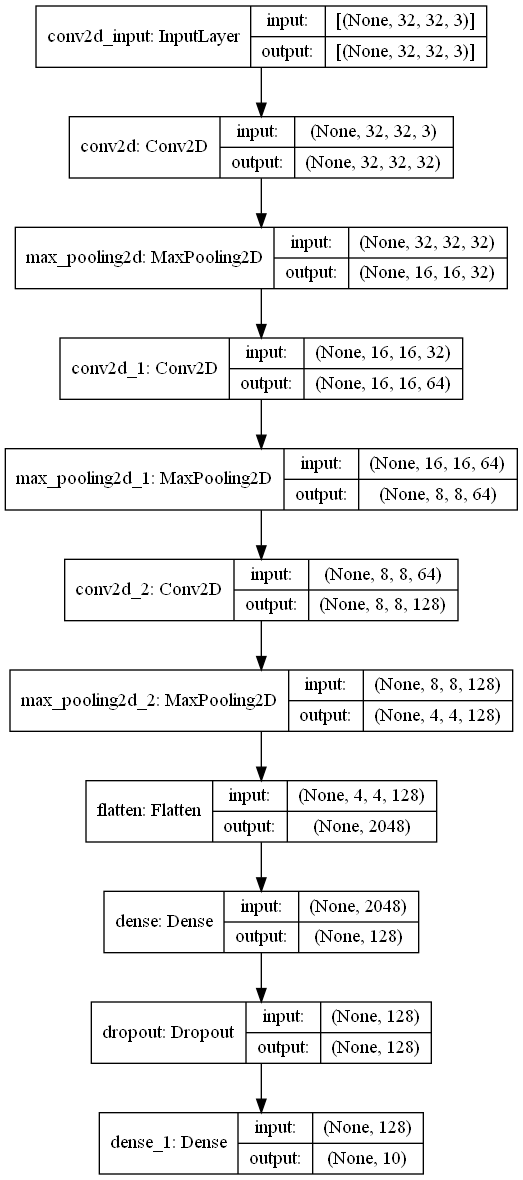

In [13]:
keras.utils.plot_model(model, "cnn_cifar10.png", show_shapes=True)

# Compile the model using categorical crossentropy loss and optimizer to be used is RMSprop. The learning rate value must be 0.0001 and metric used is accuracy

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])

# Train the model with batch_size=128, epochs=100. Display the curves of loss and accuracy during training. Check if the model is overfitting or underfitting and comment on that. Then save the model (in .h5 format) using model.save

In [15]:
#from keras.callbacks import ModelCheckpoint

checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_CIFAR10.h5", save_best_only=True)

history= model.fit(X_train,
         y_train,
         batch_size=128,
         epochs=100,
         validation_data=(X_valid, y_valid),
         callbacks=[checkpoint_cb])

Epoch 1/100
352/352 [==============================] - 12s 23ms/step - loss: 2.1664 - accuracy: 0.2030 - val_loss: 1.8191 - val_accuracy: 0.3586
Epoch 2/100
352/352 [==============================] - 6s 16ms/step - loss: 1.8226 - accuracy: 0.3454 - val_loss: 1.6392 - val_accuracy: 0.4296
Epoch 3/100
352/352 [==============================] - 6s 16ms/step - loss: 1.6713 - accuracy: 0.3982 - val_loss: 1.5198 - val_accuracy: 0.4676
Epoch 4/100
352/352 [==============================] - 6s 16ms/step - loss: 1.5756 - accuracy: 0.4329 - val_loss: 1.4710 - val_accuracy: 0.4780
Epoch 5/100
352/352 [==============================] - 6s 16ms/step - loss: 1.5076 - accuracy: 0.4570 - val_loss: 1.4040 - val_accuracy: 0.4984
Epoch 6/100
352/352 [==============================] - 6s 16ms/step - loss: 1.4518 - accuracy: 0.4759 - val_loss: 1.3496 - val_accuracy: 0.5170
Epoch 7/100
352/352 [==============================] - ETA: 0s - loss: 1.4033 - accuracy: 0.49 - 6s 16ms/step - loss: 1.4033 - accuracy

Epoch 57/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6745 - accuracy: 0.7662 - val_loss: 0.8013 - val_accuracy: 0.7256
Epoch 58/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6643 - accuracy: 0.7681 - val_loss: 0.8319 - val_accuracy: 0.7112
Epoch 59/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6485 - accuracy: 0.7731 - val_loss: 0.8020 - val_accuracy: 0.7220
Epoch 60/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6438 - accuracy: 0.7782 - val_loss: 0.7755 - val_accuracy: 0.7350
Epoch 61/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6428 - accuracy: 0.7767 - val_loss: 0.8060 - val_accuracy: 0.7310
Epoch 62/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6370 - accuracy: 0.7800 - val_loss: 0.7764 - val_accuracy: 0.7376
Epoch 63/100
352/352 [==============================] - 6s 16ms/step - loss: 0.6160 - accuracy: 0.7885 - val_loss: 0.7986 - val_ac

**Ans:** The model is neither overfitting nor underfitting since the training accuracy is similar to validation accuracy

In [16]:
model.save("CNN_CIFAR10.h5") ## save the pre-trained model for later use
model.save_weights("CNN_weights.ckpt") ##you can also save weights only
#model.load_weights("CNN_weights.ckpt") # load weights only

# Evaluate the model on test data using several evaluation metrics such as accuracy, precision, and recall. Make a comparison of AUC values for each class depicted through a ROC graph

In [17]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 352}

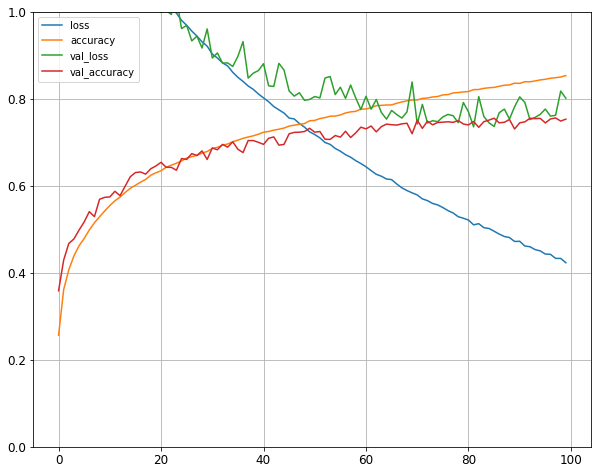

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10, 8)) ### plot the loss curves
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8390847444534302
Test accuracy: 0.7462000250816345


In [20]:
###Evaluate the model performance on test data

X_new = X_test[:10] # pretend these are new instances
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("\nPredictions:\n" ,y_pred) ## print predictions

y_new = y_tst_org [:10]
print("\nActual values:\n" , y_new) #print the actual labels for the first 10 observations


Predictions:
 [3 8 8 0 6 6 1 6 3 1]

Actual values:
 [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [23]:
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

pred_all = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_tst_org, pred_all)
cm ###multi classification, multiple classes (0-9)

array([[785,  10,  55,  20,  27,   6,   7,   6,  53,  31],
       [ 15, 793,   9,  16,   6,   3,  14,   4,  30, 110],
       [ 55,   4, 639,  61, 116,  37,  42,  30,   7,   9],
       [ 12,   8,  64, 617,  98,  82,  59,  37,  13,  10],
       [ 10,   3,  46,  43, 785,  16,  36,  48,  11,   2],
       [ 10,   1,  55, 231,  73, 543,  26,  46,   6,   9],
       [  6,   1,  42,  66,  54,  15, 799,   6,   6,   5],
       [  8,   3,  39,  41,  80,  25,   7, 784,   0,  13],
       [ 46,  18,  15,  15,   9,   4,   5,   0, 857,  31],
       [ 25,  42,  10,  20,   5,   3,   3,  12,  20, 860]], dtype=int64)

In [24]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, pred_all, average='weighted')))


Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.75
Macro Recall: 0.75
Macro F1-score: 0.75

Weighted Precision: 0.75
Weighted Recall: 0.75
Weighted F1-score: 0.75


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


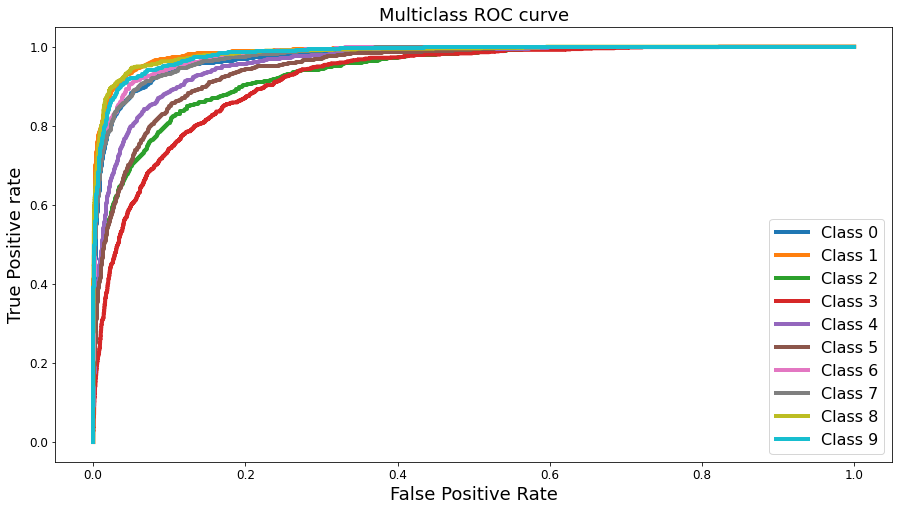

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr = {}
tpr = {}
thres ={}
n_class = 10

pred_prob = model.predict_proba(X_test) #predict the probabilities for each class

for i in range(n_class): # iterate through the classes 
    fpr[i], tpr[i], thres[i] = roc_curve(y_tst_org, pred_prob[:,i], pos_label=i) #call the roc_curve function

#set the figure size
figure = plt.figure(figsize=(15, 8))
# plotting    
plt.plot(fpr[0], tpr[0],linewidth = 4, label='Class 0')
plt.plot(fpr[1], tpr[1],linewidth = 4,label='Class 1')
plt.plot(fpr[2], tpr[2],linewidth = 4,label='Class 2')
plt.plot(fpr[3], tpr[3],linewidth = 4,label='Class 3')
plt.plot(fpr[4], tpr[4],linewidth = 4, label='Class 4')
plt.plot(fpr[5], tpr[5],linewidth = 4, label='Class 5')
plt.plot(fpr[6], tpr[6],linewidth = 4,label='Class 6')
plt.plot(fpr[7], tpr[7],linewidth = 4,label='Class 7')
plt.plot(fpr[8], tpr[8],linewidth = 4,label='Class 8')
plt.plot(fpr[9], tpr[9],linewidth = 4, label='Class 9')

plt.title('Multiclass ROC curve',fontsize = 18)
plt.xlabel('False Positive Rate',fontsize = 18)
plt.ylabel('True Positive rate',fontsize = 18)
plt.legend(loc='best',fontsize = 16)

plt.show() #display the plot